In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns; sns.set()

In [3]:
training_set1 = pd.read_csv(r'C:\Users\ADMIN\Desktop\training_audit_data.csv')
test_set1 = pd.read_csv(r'C:\Users\ADMIN\Desktop\test_audit_data-1.csv')

In [4]:
Labels = training_set1.iloc[:,-1]

(0.0, 3.0)

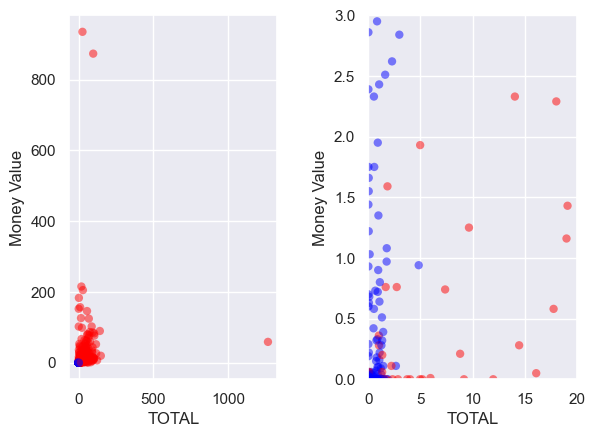

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=2.50)

plt.subplot(121)
dots_trn=plt.scatter(training_set1.iloc[:,4],training_set1.iloc[:,6], c=['blue' if i == 0 else 'red' for i in Labels],
                     edgecolor='none', alpha=0.5)
plt.xlabel('TOTAL')
plt.ylabel('Money Value')


plt.subplot(122)
dots_trn2=plt.scatter(training_set1.iloc[:,4],training_set1.iloc[:,6], c=['blue' if i == 0 else 'red' for i in Labels],
                      edgecolor='none', alpha=0.5)
plt.xlabel("TOTAL")
plt.ylabel("Money Value")
plt.xlim([0,20])
plt.ylim([0,3])

In [6]:
Inputs = training_set1.iloc[:,:-1]
Inputs_test = test_set1.iloc[:,:-1]

statistics = StandardScaler().fit(Inputs)
x1 = statistics.transform(Inputs)
x2 = statistics.transform(Inputs_test)



Explained Variance ratios:  [2.74123511e-01 1.42593272e-01 1.11590565e-01 1.04623242e-01
 9.53081367e-02 8.89026520e-02 8.37932726e-02 5.56670926e-02
 4.33982556e-02 1.14160993e-35]

 Total Variance Explained: 100.0


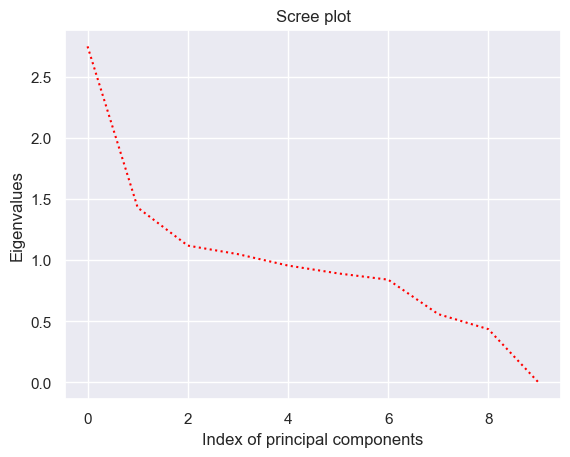

In [29]:
pca = PCA()
scaler_data = pca.fit(x1)
data_projections = scaler_data.transform(x1)

figure = plt.figure()
ax = plt.gca()
plt.plot(pca.explained_variance_, color='red', linestyle='dotted')
ax.set_title("Scree plot")
ax.set_xlabel("Index of principal components")
ax.set_ylabel("Eigenvalues")
print("Explained Variance ratios: ",pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Text(0, 0.5, 'PC2')

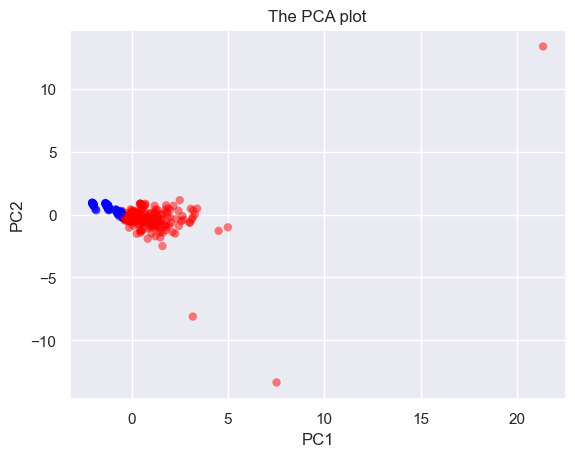

In [11]:
figure = plt.figure()
ax = plt.gca()
plt.scatter(data_projections[:,0],data_projections[:,1], c=['blue' if i == 0 else 'red' for i in Labels],
            edgecolor='none', alpha=0.5)
ax.set_title("The PCA plot")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

data_projections_test = scaler_data.transform(x2)

In [12]:
Xtrain, Xtest, ytrain, ytest = train_test_split(training_set1.iloc[:,:-1], training_set1.iloc[:,-1], test_size = 0.30,
                                                random_state=42)

In [13]:
Xtrain.shape

(273, 10)

In [14]:
Xtest.shape

(118, 10)

In [15]:
Scaler = StandardScaler().fit(Xtrain)
scaled_trnX = Scaler.transform(Xtrain)   

scaled_valX = Scaler.transform(Xtest) 

In [16]:
svc1 = SVC(kernel='rbf', class_weight='balanced', C=1, gamma=10)
model1 = svc1.fit(scaled_trnX, ytrain)

vyfit1 = model1.predict(scaled_valX)

print('Accuracy:', metrics.accuracy_score(ytest,vyfit1))

print(classification_report(ytest, vyfit1, target_names=['0','1']))

Accuracy: 0.9830508474576272
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.96      1.00      0.98        55

    accuracy                           0.98       118
   macro avg       0.98      0.98      0.98       118
weighted avg       0.98      0.98      0.98       118



In [17]:
svc2 = SVC(kernel='rbf', class_weight='balanced', C=1, gamma=0.5)
model2 = svc2.fit(scaled_trnX, ytrain)

vyfit2 = model2.predict(scaled_valX)

print('Accuracy:', metrics.accuracy_score(ytest,vyfit2))

print(classification_report(ytest, vyfit2, target_names=['0','1']))

Accuracy: 0.9745762711864406
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        63
           1       1.00      0.95      0.97        55

    accuracy                           0.97       118
   macro avg       0.98      0.97      0.97       118
weighted avg       0.98      0.97      0.97       118



In [18]:
svc3 = SVC(kernel='rbf', class_weight='balanced', C=5, gamma=10)
model3 = svc3.fit(scaled_trnX, ytrain)

vyfit3 = model3.predict(scaled_valX)

print('Accuracy:', metrics.accuracy_score(ytest,vyfit3))

print(classification_report(ytest, vyfit3, target_names=['0','1']))

Accuracy: 0.9915254237288136
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        63
           1       0.98      1.00      0.99        55

    accuracy                           0.99       118
   macro avg       0.99      0.99      0.99       118
weighted avg       0.99      0.99      0.99       118



In [19]:
svc4 = SVC(kernel='linear', class_weight='balanced', C=0.1)
model4 = svc4.fit(scaled_trnX, ytrain)

vyfit4 = model4.predict(scaled_valX)

print('Accuracy:', metrics.accuracy_score(ytest,vyfit4))

print(classification_report(ytest, vyfit4, target_names=['0','1']))

Accuracy: 0.9152542372881356
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        63
           1       1.00      0.82      0.90        55

    accuracy                           0.92       118
   macro avg       0.93      0.91      0.91       118
weighted avg       0.93      0.92      0.91       118



In [20]:
suitable_gamma = 10
penalty_parameter=5

Accuracy: 0.848404255319149
              precision    recall  f1-score   support

           0       0.64      0.85      0.73        92
           1       0.95      0.85      0.89       284

    accuracy                           0.85       376
   macro avg       0.79      0.85      0.81       376
weighted avg       0.87      0.85      0.85       376



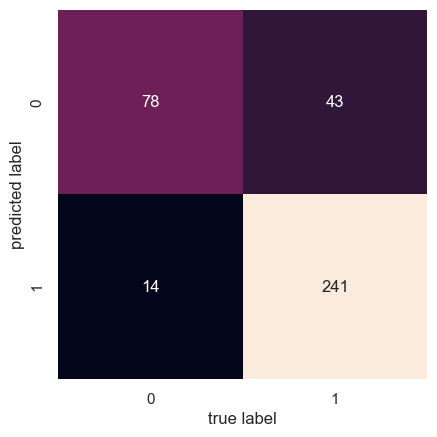

In [25]:
trainingX1 = training_set1.iloc[:,:-1]
testX1 = test_set1.iloc[:,:-1]

train_validation1 = training_set1.iloc[:,-1]
test_validation1 = test_set1.iloc[:,-1]

statistics1 = StandardScaler().fit(trainingX1)

scaled_training_set1 = statistics1.transform(trainingX1)
scaled_test_set1 = statistics1.transform(testX1)

svc5 = SVC(kernel='rbf', class_weight='balanced', C=penalty_parameter, gamma=suitable_gamma)
model5 = svc5.fit(scaled_training_set1,train_validation1)
vyfit5 = model5.predict(scaled_test_set1)

print('Accuracy:', metrics.accuracy_score(test_validation1,vyfit5))
print(classification_report(test_validation1, vyfit5, target_names=['0','1']))

mat1 = confusion_matrix(test_validation1, vyfit5)
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.xlabel('true label')
plt.ylabel('predicted label');

Accuracy: 0.8297872340425532
              precision    recall  f1-score   support

           0       0.61      0.86      0.71        92
           1       0.95      0.82      0.88       284

    accuracy                           0.83       376
   macro avg       0.78      0.84      0.80       376
weighted avg       0.86      0.83      0.84       376



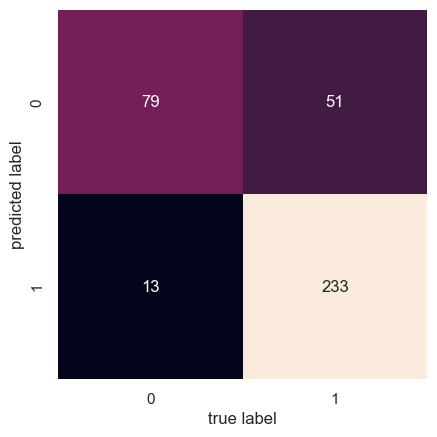

In [30]:
final_training_set = training_set1.iloc[:,:-1]
final_test_set = test_set1.iloc[:,:-1]

final_train_validation = training_set1.iloc[:,-1]
final_test_validation = test_set1.iloc[:,-1]

final_statistics = StandardScaler().fit(final_training_set)
scaled_final_trainX = final_statistics.transform(final_training_set)
scaled_final_testX  = final_statistics.transform(final_test_set)

pca_final = PCA(n_components = 6)
scaler_final = pca_final.fit(scaled_final_trainX)
train_data_projections = pca_final.transform(scaled_final_trainX)
test_data_projections = pca_final.transform(scaled_final_testX)

svc6 = SVC(kernel='rbf', class_weight='balanced', C=penalty_parameter, gamma=suitable_gamma)
model6 = svc6.fit(train_data_projections,final_train_validation)

vyfit6 = model6.predict(test_data_projections)

print('Accuracy:', metrics.accuracy_score(final_test_validation,vyfit6))

print(classification_report(final_test_validation, vyfit6, target_names=['0','1']))

mat = confusion_matrix(final_test_validation, vyfit6)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.xlabel('true label')
plt.ylabel('predicted label');

#print(sum(pca_final.explained_variance_ratio_))